In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib

# Problem 1, question b)

In [27]:
mu=1e-2
Nwt=200
Nmut_n=np.random.poisson(mu*Nwt)
print(Nmut_n)

1


In [30]:
mu=1e-2
Nwt=200
Nmut_n=np.random.poisson(mu*Nwt,10000)

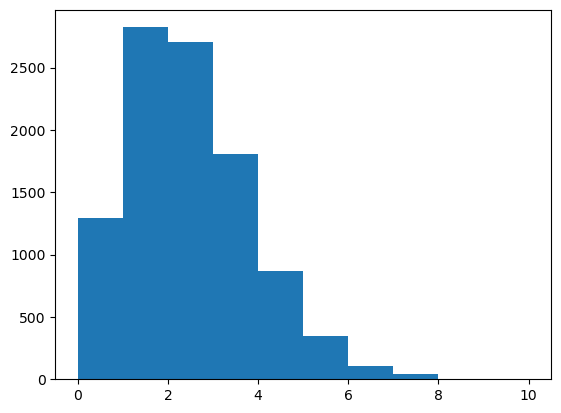

In [31]:
plt.hist(Nmut_n)
plt.show()

In [5]:
np.mean(Nmut_n)

2.0004

In [6]:
np.var(Nmut_n)

1.9371998400000001

# Problem 1, question c)

In [39]:
mu=2e-9
Nwt=200
Nmut=0
for g in range(21):
    Nmut_n=np.random.poisson(mu*Nwt)
    Nwt_n=Nwt-Nmut_n
    Nmut=2*Nmut+Nmut_n
    Nwt=Nwt+Nwt_n

In [40]:
Nmut

0

In [34]:
Nwt+Nmut

419430400

In [35]:
200*2**21

419430400

# Problem 1, questions d-e)

In [43]:
mu=2e-9
C=500
Nmut_f = np.zeros((C,1))
for c in range(C):
    Nwt=200
    Nmut=0
    for g in range(21):
        Nmut_n=np.random.poisson(mu*Nwt)
        Nwt_n=Nwt-Nmut_n
        Nmut=2*Nmut+Nmut_n
        Nwt=Nwt+Nwt_n
    Nmut_f[c]=Nmut

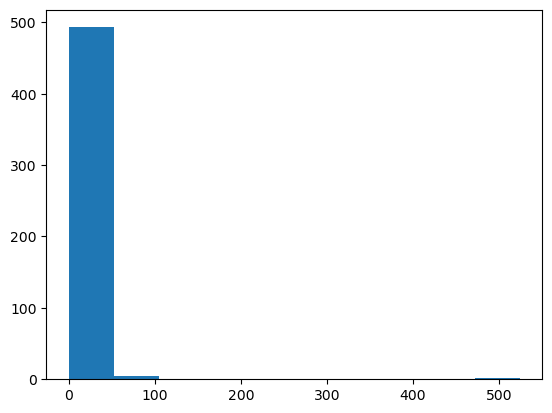

In [44]:
plt.hist(Nmut_f)
plt.show()

In [13]:
np.mean(Nmut_f)

5.544

In [14]:
np.var(Nmut_f)

2644.4520640000005

# Problem 1, question f)

In [45]:
mu=2e-9
C=500
Nmut_f = np.zeros((C,1))
gen_mut = np.zeros((C,1))
for c in range(C):
    Nwt=200
    Nmut=0
    for g in range(21):
        Nmut_n=np.random.poisson(mu*Nwt)
        Nwt_n=Nwt-Nmut_n
        if Nmut==0 and Nmut_n>0:
            gen_mut[c]=g+1
        elif Nmut==0 and g==20:
            gen_mut[c]=g+2
        Nmut=2*Nmut+Nmut_n
        Nwt=Nwt+Nwt_n
    Nmut_f[c]=Nmut

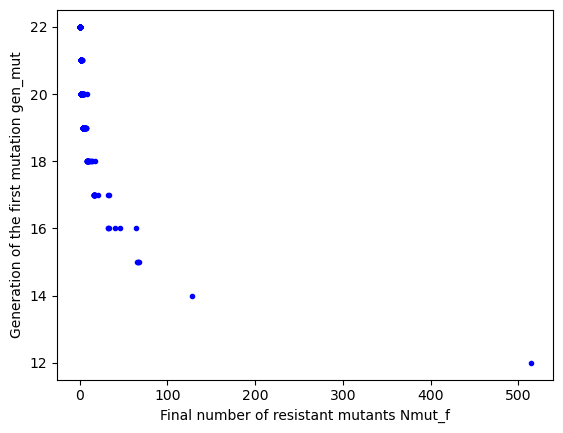

In [46]:
plt.plot(Nmut_f, gen_mut,'b.')
ax = plt.gca()
ax.set_xlabel("Final number of resistant mutants Nmut_f")
ax.set_ylabel("Generation of the first mutation gen_mut")
plt.show()

# Problem 2

In [17]:
data = np.load('Data3.npy')

FileNotFoundError: [Errno 2] No such file or directory: 'Data3.npy'

In [ ]:
data

array([[0.000e+00, 2.900e+01],
       [1.000e+00, 1.700e+01],
       [2.000e+00, 4.000e+00],
       [3.000e+00, 3.000e+00],
       [4.000e+00, 3.000e+00],
       [5.000e+00, 2.000e+00],
       [6.000e+00, 5.000e+00],
       [1.100e+01, 6.000e+00],
       [2.100e+01, 7.000e+00],
       [5.100e+01, 5.000e+00],
       [1.010e+02, 2.000e+00],
       [2.010e+02, 4.000e+00],
       [5.010e+02, 0.000e+00],
       [1.001e+03, 0.000e+00]])

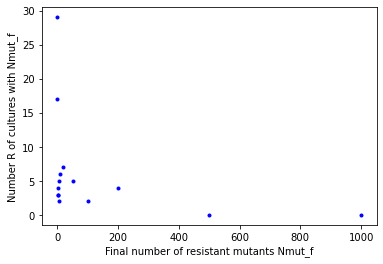

In [ ]:
plt.plot(data[:,0],data[:,1],'b.')
ax = plt.gca()
ax.set_xlabel("Final number of resistant mutants Nmut_f")
ax.set_ylabel("Number R of cultures with Nmut_f")
plt.show()

In [ ]:
datab=np.zeros((np.size(data,0)-1,np.size(data,1)))
for i in range(np.size(data,0)-1): #loop over rows
    min=data[i,0]
    max=data[i+1,0]-1
    datab[i,0]=(min+max)/2
    datab[i,1]=data[i,1]

In [ ]:
datab

array([[  0. ,  29. ],
       [  1. ,  17. ],
       [  2. ,   4. ],
       [  3. ,   3. ],
       [  4. ,   3. ],
       [  5. ,   2. ],
       [  8. ,   5. ],
       [ 15.5,   6. ],
       [ 35.5,   7. ],
       [ 75.5,   5. ],
       [150.5,   2. ],
       [350.5,   4. ],
       [750.5,   0. ]])

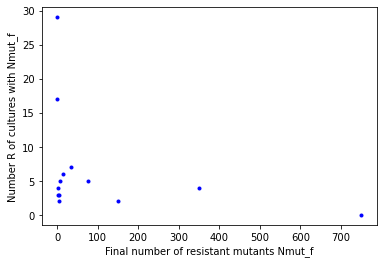

In [ ]:
plt.plot(datab[:,0],datab[:,1],'b.')
ax = plt.gca()
ax.set_xlabel("Final number of resistant mutants Nmut_f")
ax.set_ylabel("Number R of cultures with Nmut_f")
plt.show()

In [ ]:
dataMean=0
for i in range(np.size(datab,0)):
    dataMean=dataMean+datab[i,0]*datab[i,1]
dataMean=dataMean/np.sum(datab[:,1])

In [ ]:
dataMean

28.942528735632184

In [ ]:
dataMeanSquare=0
for i in range(np.size(datab,0)):
    dataMeanSquare=dataMeanSquare+datab[i,0]**2*datab[i,1]
dataMeanSquare=dataMeanSquare/np.sum(datab[:,1])

In [ ]:
dataMeanSquare

6620.045977011494

In [ ]:
dataVar=dataMeanSquare-dataMean**2

In [ ]:
dataVar

5782.3760073985995